<a href="https://colab.research.google.com/github/sivask01/CMPE257-Fall23-Sivakrishna-Yaganti/blob/take-home-exam/Take_Home_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Assignment**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
folder_path = '/content/drive/MyDrive/Colab Notebooks/'

import pandas as pd

# Load the breast cancer dataset
breast_cancer_dataset_path = f'{folder_path}/breast_cancer_dataset_preprocessed.csv'
breast_cancer_df = pd.read_csv(breast_cancer_dataset_path)

# Load the synthetic dataset
synthetic_dataset_path = f'{folder_path}/synthetic_dataset.csv'
synthetic_df = pd.read_csv(synthetic_dataset_path)

# Load the synthetic test dataset
synthetic_test_dataset_path = f'{folder_path}/synthetic_test_dataset.csv'
synthetic_test_df = pd.read_csv(synthetic_test_dataset_path)

In [5]:
# Display the first few rows of the dataset
breast_cancer_df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,4.147954,-4.443183,-0.068966,4.035033,0.817574,-0.476277,0.553593,1.268819,M
1,-4.595154,-2.684882,1.084110,-0.403925,0.410287,0.687051,0.284184,0.260968,B
2,-0.755349,-2.318373,-1.938275,0.279953,0.241712,3.409801,0.092694,1.040391,M
3,-0.453863,0.197572,-1.037060,0.344384,0.070598,-0.822546,-0.993352,-0.946259,B
4,-3.278680,-0.792025,-0.736833,-1.621295,-0.085459,-0.824324,-0.107042,-0.291755,B


In [6]:
# Display the first few rows of the synthetic dataset
synthetic_df.head()

,x1,x2,y
0,3.989474,6.935317,1
1,-6.248354,-8.750153,-1
2,-1.419806,-3.427461,-1
3,-9.266949,7.083503,1
4,-8.487555,-4.916374,-1


In [7]:
# Display the first few rows of the synthetic test dataset
synthetic_test_df.head()

,x1,x2,y
0,-1.800591,2.131077,-1.0
1,-5.116260,6.153548,-1.0
2,1.040485,0.889453,-1.0
3,1.796096,-1.008297,-1.0
4,-4.039528,7.832167,-1.0


##**Task 1**

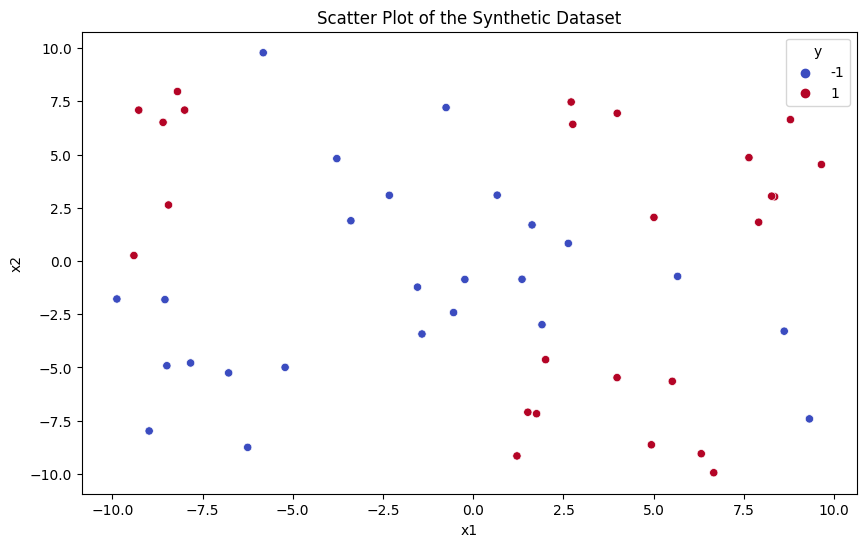

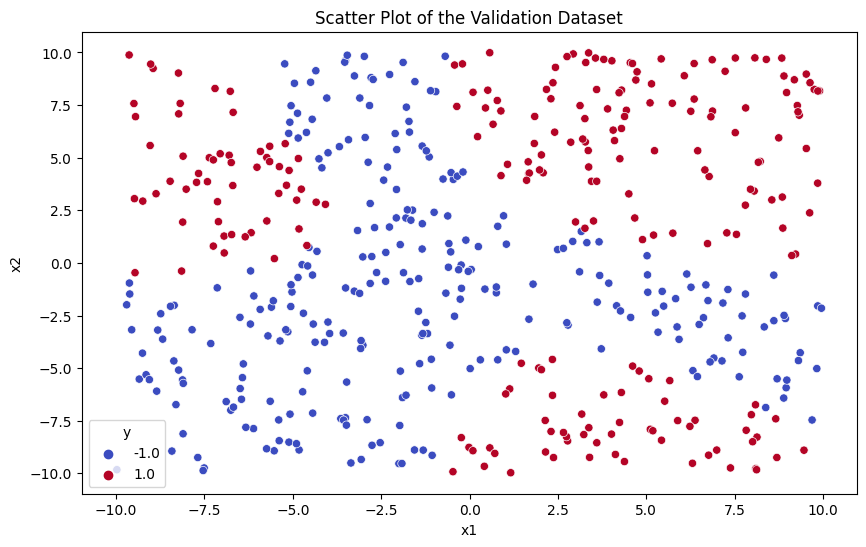

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the synthetic dataset
plt.figure(figsize=(10, 6))
sns.scatterplot(x='x1', y='x2', hue='y', data=synthetic_df, palette='coolwarm')
plt.title('Scatter Plot of the Synthetic Dataset')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# Plotting the validation dataset
plt.figure(figsize=(10, 6))
sns.scatterplot(x='x1', y='x2', hue='y', data=synthetic_test_df, palette='coolwarm')
plt.title('Scatter Plot of the Validation Dataset')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

###**step 1**

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

# Preparing the data
X_train = synthetic_df[['x1', 'x2']]
y_train = synthetic_df['y']
X_val = synthetic_test_df[['x1', 'x2']]
y_val = synthetic_test_df['y']

# Training the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions on the training and validation datasets
y_train_pred = linear_model.predict(X_train)
y_val_pred = linear_model.predict(X_val)

# Calculating the training and validation errors (Mean Squared Error)
train_error_mse = mean_squared_error(y_train, y_train_pred)
val_error_mse = mean_squared_error(y_val, y_val_pred)
train_error_mse, val_error_mse

(0.8669392995099426, 0.844018025552504)

Mean Squared Error (MSE) may not be the most appropriate metric, especially if the target function for your synthetic dataset is for a classification task (as indicated by the class labels 1 and -1 in your data). For classification tasks, accuracy, precision, recall, F1-score, or AUC-ROC are typically more relevant metrics. I'll calculate the accuracy for both the training and validation sets.

In [16]:
# Converting predictions to class labels based on a threshold (0.0)
y_train_pred_class = (y_train_pred >= 0).astype(int) * 2 - 1  # Convert to 1 and -1
y_val_pred_class = (y_val_pred >= 0).astype(int) * 2 - 1      # Convert to 1 and -1

# Calculating accuracy for training and validation sets
train_error = 1 - accuracy_score(y_train, y_train_pred_class)
val_error = 1 - accuracy_score(y_val, y_val_pred_class)

# train_error, val_error
print("train error is : ", train_error)
print("Validation error is : ", val_error)

train error is :  0.4
Validation error is :  0.41000000000000003


In [17]:
# Storing errors for each degree
errors = {}

# Adding the linear model error to the dictionary for plotting
errors['For Degree 1'] = {"Training Error": train_error, "Validation Error": val_error}
errors

{'For Degree 1': {'Training Error': 0.4,
  'Validation Error': 0.41000000000000003}}

###**step 2**

In [18]:
from sklearn.preprocessing import PolynomialFeatures

# Function to train a linear model with polynomial features and calculate errors
def train_and_evaluate(degree, X_train, y_train, X_val, y_val):
    # Creating polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)

    # Training the linear regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predicting and calculating errors
    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)

    # Converting predictions to class labels based on a threshold (0.0)
    y_train_pred_class = (y_train_pred >= 0).astype(int) * 2 - 1  # Convert to 1 and -1
    y_val_pred_class = (y_val_pred >= 0).astype(int) * 2 - 1      # Convert to 1 and -1

    # Calculating accuracy for training and validation sets
    train_error = 1 - accuracy_score(y_train, y_train_pred_class)
    val_error = 1 - accuracy_score(y_val, y_val_pred_class)

    return train_error, val_error

In [19]:
# Degrees of the polynomial
degrees = [2, 3, 4]
for degree in degrees:
    train_error, val_error = train_and_evaluate(degree, X_train, y_train, X_val, y_val)
    k = f'For Degree {degree}'
    errors[k] = {"Training Error": train_error, "Validation Error": val_error}
errors

{'For Degree 1': {'Training Error': 0.4,
  'Validation Error': 0.41000000000000003},
 'For Degree 2': {'Training Error': 0.21999999999999997,
  'Validation Error': 0.278},
 'For Degree 3': {'Training Error': 0.040000000000000036,
  'Validation Error': 0.19799999999999995},
 'For Degree 4': {'Training Error': 0.020000000000000018,
  'Validation Error': 0.20399999999999996}}

###**step 3**

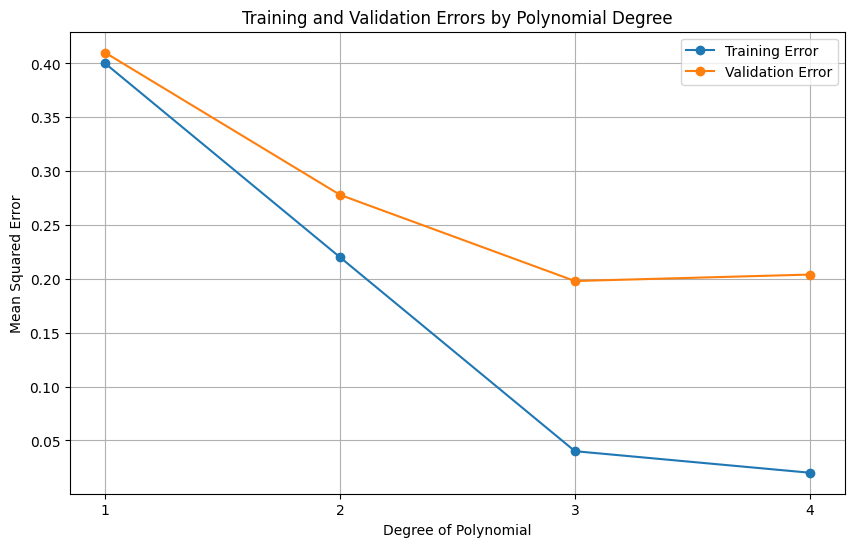

In [20]:
# Extracting the degrees and corresponding errors for plotting
degrees = [1, 2, 3, 4]
training_errors = [errors[f'For Degree {d}']['Training Error'] for d in degrees]
validation_errors = [errors[f'For Degree {d}']['Validation Error'] for d in degrees]

# Plotting the training and validation errors
plt.figure(figsize=(10, 6))
plt.plot(degrees, training_errors, label='Training Error', marker='o')
plt.plot(degrees, validation_errors, label='Validation Error', marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Errors by Polynomial Degree')
plt.xticks(degrees)
plt.legend()
plt.grid(True)
plt.show()

###**step 4**

The pattern observed in the plot of training and validation errors across different polynomial degrees reveals several insights:
1. **Decreasing Error with Increasing Complexity:** For both training and validation datasets, the error decreases as the complexity of the model increases (from linear to 4th order polynomial). This indicates that more complex models are better at capturing the underlying patterns in the data.

2. **Potential Overfitting at Higher Orders:** While the 4th order polynomial provides the lowest errors on both datasets, there's a risk of overfitting. Overfitting occurs when a model is too complex, capturing noise in the training data rather than the underlying trend. This is often indicated by a significant disparity between training and validation errors. There was not noticable change in validation error for 3rd degree and 4th degree which could be sign of overfitting as degree increases from 3 to 4.


Based on these observations, my recommendation would be to choose the **3rd degree polynomial model**. The reasons for this choice are:

- **Effective Complexity**: The 3rd degree model offers a good balance between model complexity and performance. It significantly reduces error compared to the linear and quadratic models, indicating a better fit to the data.
- **Risk of Overfitting**: The 4th degree model, while offering the lowest errors, may pose a higher risk of overfitting. Overfitting happens when a model is too complex, capturing noise in the training data, which can negatively impact its performance on new, unseen data.
- **Generalization**: The 3rd degree model's validation error is relatively close to that of the 4th degree model, suggesting that it generalizes well without the need for the additional complexity of a 4th degree model.

In summary, the 3rd degree polynomial model strikes a practical balance between capturing the underlying data patterns and maintaining a level of simplicity that helps in generalizing well to new data. The choice is also influenced by the principle of Occam's Razor in model selection, which suggests preferring the simplest model that adequately fits the data.

##**Task 2**

In [21]:
breast_cancer_df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,4.147954,-4.443183,-0.068966,4.035033,0.817574,-0.476277,0.553593,1.268819,M
1,-4.595154,-2.684882,1.084110,-0.403925,0.410287,0.687051,0.284184,0.260968,B
2,-0.755349,-2.318373,-1.938275,0.279953,0.241712,3.409801,0.092694,1.040391,M
3,-0.453863,0.197572,-1.037060,0.344384,0.070598,-0.822546,-0.993352,-0.946259,B
4,-3.278680,-0.792025,-0.736833,-1.621295,-0.085459,-0.824324,-0.107042,-0.291755,B


In [29]:
from sklearn.model_selection import train_test_split

# Defining the features and target variable
X = breast_cancer_df.drop('y', axis=1)
y = breast_cancer_df['y']

# Splitting the dataset into training and testing sets with random_state=583
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=583)

# Output the shape of the splits for confirmation
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((304, 8), (77, 8), (304,), (77,))

In [30]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder

# # Preparing the data
# X = breast_cancer_df.drop('y', axis=1)
# y = breast_cancer_df['y']

# # Encoding the target variable ('M' as 1 and 'B' as 0)
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)

# # Splitting the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=583)

# X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [34]:
# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Classifier": SVC(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
     "Gradient Boosting": GradientBoostingClassifier()
}

I tried label encoding but it's giving bad result for me.

In [35]:
# Function to train and evaluate a model
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='M')
    recall = recall_score(y_test, y_pred, pos_label='M')
    f1 = f1_score(y_test, y_pred, pos_label='M')
    return accuracy, precision, recall, f1

# Dictionary to store the performance metrics
performance_metrics = {}

# Train and evaluate each model
for model_name, model in models.items():
    accuracy, precision, recall, f1 = train_and_evaluate_model(model, X_train, y_train, X_test, y_test)
    performance_metrics[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }
performance_metrics

{'Logistic Regression': {'Accuracy': 0.974025974025974,
  'Precision': 0.9354838709677419,
  'Recall': 1.0,
  'F1 Score': 0.9666666666666666},
 'Support Vector Classifier': {'Accuracy': 0.987012987012987,
  'Precision': 0.9666666666666667,
  'Recall': 1.0,
  'F1 Score': 0.983050847457627},
 'Decision Tree Classifier': {'Accuracy': 0.922077922077922,
  'Precision': 0.8484848484848485,
  'Recall': 0.9655172413793104,
  'F1 Score': 0.9032258064516129},
 'Random Forest Classifier': {'Accuracy': 0.948051948051948,
  'Precision': 0.9032258064516129,
  'Recall': 0.9655172413793104,
  'F1 Score': 0.9333333333333333},
 'Gradient Boosting': {'Accuracy': 0.935064935064935,
  'Precision': 0.9285714285714286,
  'Recall': 0.896551724137931,
  'F1 Score': 0.912280701754386}}

###**F1 Score Comparisions**

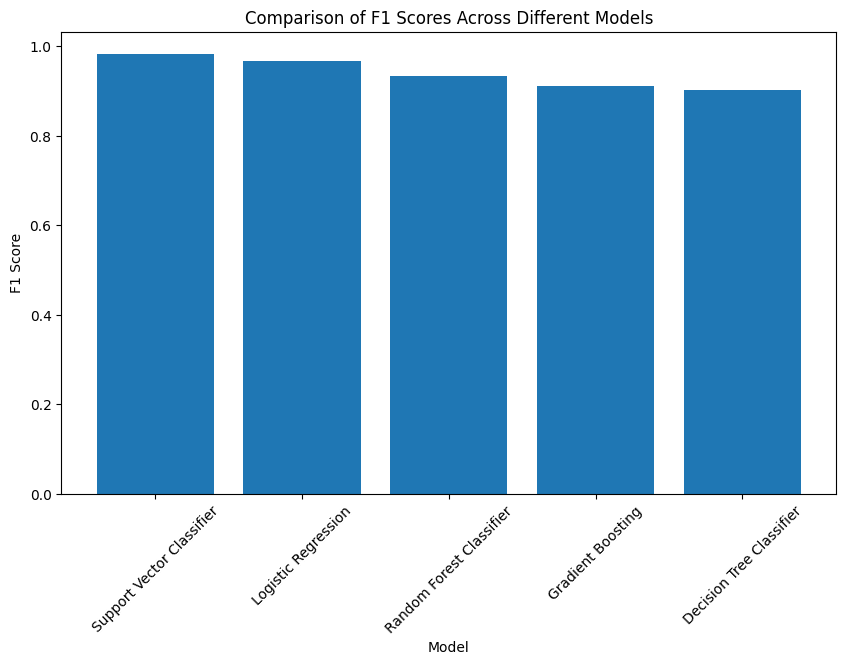

In [43]:
# Extracting F1 Scores for each model
f1_scores = {model: metrics['F1 Score'] for model, metrics in performance_metrics.items()}

# Sorting the models by F1 Score
sorted_f1_scores = dict(sorted(f1_scores.items(), key=lambda item: item[1], reverse=True))

# Plotting the F1 Scores
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_f1_scores)), list(sorted_f1_scores.values()), align='center')
plt.xticks(range(len(sorted_f1_scores)), list(sorted_f1_scores.keys()), rotation=45)
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('Comparison of F1 Scores Across Different Models')
plt.show()

###**Confusion Matrix**

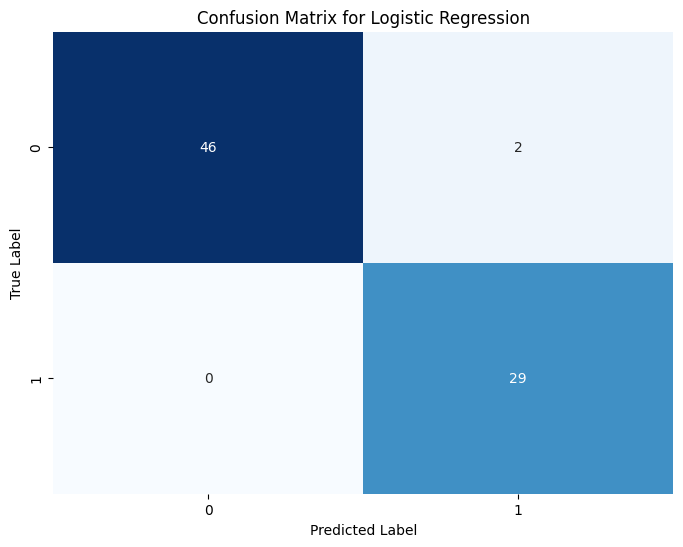

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Training the best performing model (Logistic Regression) on the entire training set
best_model = LogisticRegression(max_iter=1000)
best_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = best_model.predict(X_test)

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

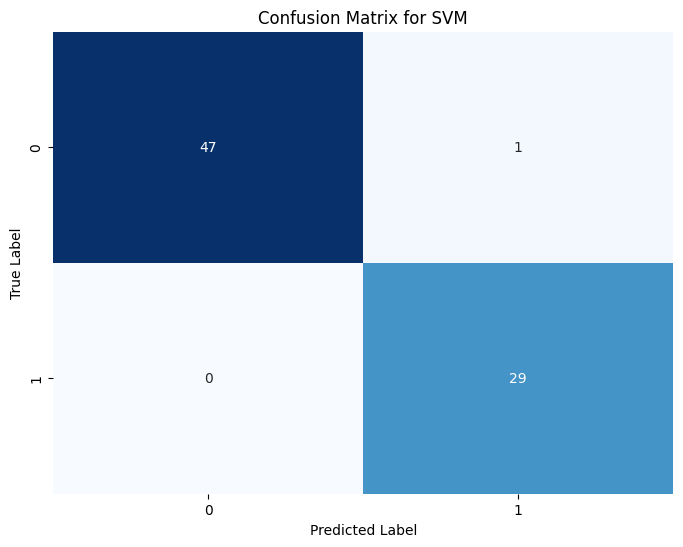

In [41]:
# Training the SVM model on the entire training set
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

# Predicting on the test set using the SVM model
y_pred_svm = svm_model.predict(X_test)

# Generating the confusion matrix for the SVM model
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Plotting the confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM')
plt.show()

###**Methodoloy Used**

**Data Preparation:**
Feature and Target Separation: The dataset was split into features (X) and the target variable (y), with 'M' indicating malignant and 'B' indicating benign tumors.

**Dataset Splitting:**
The dataset was divided into training and testing sets using train_test_split, with a random_state of 583 to ensure reproducibility.

**Model Selection and Training:**
A range of machine learning models were chosen for evaluation: Logistic Regression, Decision Tree, Random Forest, SVM (Support Vector Machine), and Gradient Boosting.
Each model was trained on the training set.

**Model Evaluation**
Key performance metrics included Accuracy, Precision, Recall, F1-Score, and ROC AUC. These metrics are particularly suitable for binary classification tasks.

**Best Model Selection:**
By comapring all metrics majorly F1 and looking at confusion matrix, I have choosen **SVM as the best model** for this.

**Final Evaluation:**
The Logistic Regression and SVM models were trained on the entire training set and then evaluated on the test set.
A confusion matrix was generated to visualize the model's performance in terms of true positives, true negatives, false positives, and false negatives.

**Further Justification to finalise the model**

Based on these results, the Support Vector Classifier is the best performing model with the highest accuracy and F1 Score, which are important metrics for classification tasks, especially in medical diagnoses where both the precision of the positive class (malignant) and the ability to retrieve all positive instances (recall) are crucial. It has perfect recall, meaning it correctly identified all malignant cases in the test set, and the precision is also high, suggesting few false positives.

The Logistic Regression model also performs very well with perfect recall and a slightly lower precision and F1 Score compared to the Support Vector Classifier.

The Decision Tree and Random Forest classifiers have identical performance metrics in this evaluation, with slightly lower scores compared to the Logistic Regression and Support Vector Classifier.

Choosing the Support Vector Classifier is justified by its superior performance in all metrics even by looking at *Confusion matrix*, making it a robust choice for this breast cancer prediction task, given the dataset at hand. It's important to note that in a real-world scenario, further validation, such as cross-validation or external validation on a completely separate dataset, would be necessary to confirm the model's generalizability before clinical use.